# Heart Disease Prediction Project
### 1) Problem Definition
### 2) Data
### 3) Evaluate
### 4) Feature
### 5) Modeling
### 6) Experimentations

# 1) Problem Definition
>Based on the given Data we need to predict if a patient has heart disease or not

# 2)Data 
> We have the data and have loaded it already

# 3) Evaluation
> In initial stages we need to make sure , if our model gives us the 95% accuracy because the problem is sensitive 

# 4) Features
> What features are important. What features columns means what<br>
> age => age in years<br>
> sex => (1 = male, 0 = female)<br>
> cp => chest paint type<br>
> trestbps => resting blood pressure (in mm Hg on admission to the hospital)<br>
> chol => serum cholestrol in mg/dl<br>
> fbs => (fasting blood sugar > 120 mg/dl)(1 = true, 0 = false)<br>
> restecg => resting electrocardiographic results<br>
> thalach => maximum heart rate achieved<br>
> exang => exercise induced angina( 1 = yes, 0 = false)<br>
> oldpeak => St depression induced by exercise relative to rest<br>
> slope => The slope of the peak exercise ST segment<br>
> ca => number of major vessels(0-3) colored by fourscopy<br>
> thal => 3 = normal:6 = fixed defect:7 = reversable defect<br>
> target => 1 or 0<br>

In [37]:
# Tools Preparation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importing models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Import Evaluation libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

# Exploring the Data Initial Stage
>1) What problem i am going to solve 
>2) what kind of data i have
>3) Does this data have missing values
>4) Are there any outliers, sporoius vectors
>5) Can we add or remove some of the features

In [39]:
df = pd.read_csv("heart.csv")
df.shape

(303, 14)

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [42]:
df['target'].value_counts() # count that how many have heart disease and how are not

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

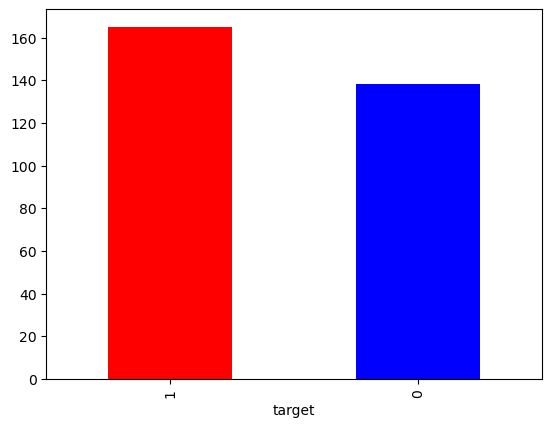

In [43]:
df['target'].value_counts().plot(kind ='bar', color =['red','blue']) # show the target variable 1 and 0 in plot

In [44]:
df.isna().sum() # are ther any missing valuse

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [45]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [46]:
df.sex.value_counts() # so we can count the number of male and female in data

sex
1    207
0     96
Name: count, dtype: int64

In [47]:
len(df) # NO of rows in data set

303

In [48]:
207/303 # almost 70% is male and the remaining is female

0.6831683168316832

In [63]:
pd.crosstab(df['target'],df['sex']) # so we can check the sex and compare that how many have a heart problem and how many are not

sex,0,1
target,,
0,24,114
1,72,93


In [66]:
72/96*100 # so we can check the percentage of heart disease in female which is 75%

75.0

In [69]:
93/207*100 # check the percentage of heart disease in Male which is 45%

44.927536231884055

In [72]:
df.age.value_counts()# Check that age column have how many type of value

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

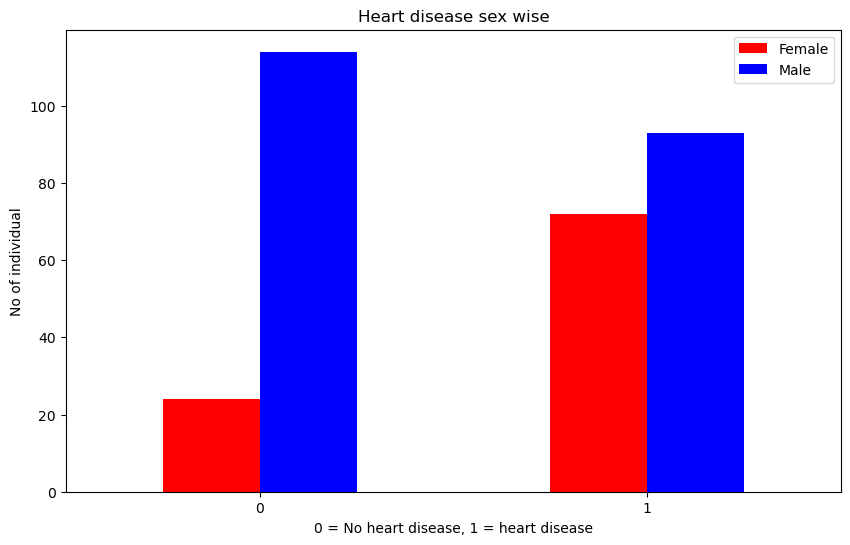

In [75]:
# so we can make a bar graph

pd.crosstab(df.target,df.sex).plot(kind = 'bar',figsize =(10,6),color = ['red','blue'])
plt.title("Heart disease sex wise")
plt.xlabel( '0 = No heart disease, 1 = heart disease')
plt.ylabel("No of individual")
plt.legend(["Female","Male"]) # so we can compare the sex ratio based on target columns 
plt.xticks(rotation = 0);# rotation = 0 is used for to rotate the 0 and 1 on right direction

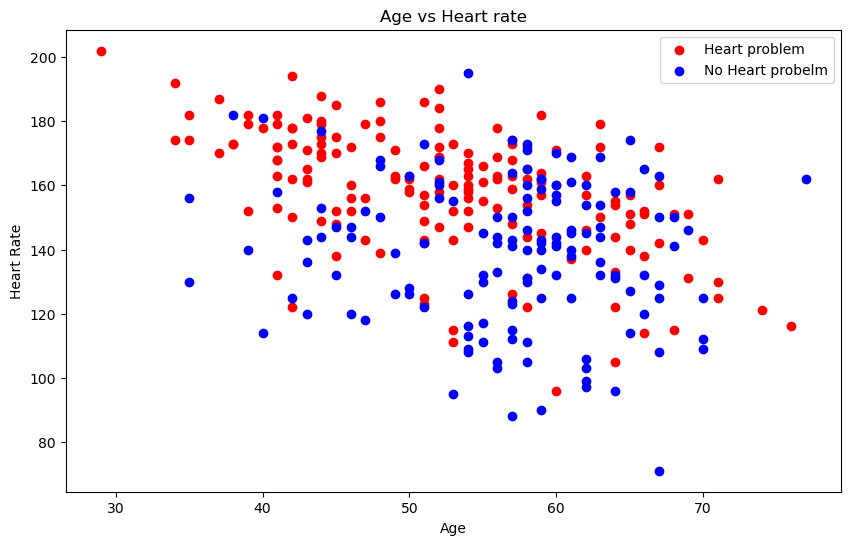

In [78]:
#Now we can compare the age and thalach column(maximum heart rate) throught scattor plot 
plt.figure(figsize = (10,6))
#For this comparison we can used scattor plot not bar plot because age is different in number in this data set max = 91 types so they donot give meaning on bar plot
# we can compare those age and thalach which have heart disease
plt.scatter(df.age[df.target == 1],df.thalach[df.target == 1], c = "red");
#we can compare those age and thalach which have no heart disease
plt.scatter(df.age[df.target == 0],df.thalach[df.target == 0], c = "blue");
plt.title("Age vs Heart rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
#Below the red dot show the heart problem and blue which have no heart problem
plt.legend(["Heart problem","No Heart probelm"])
# from graph we can analyze that thos person which have a heart problem age and thalac is iversly proportional to each other
           

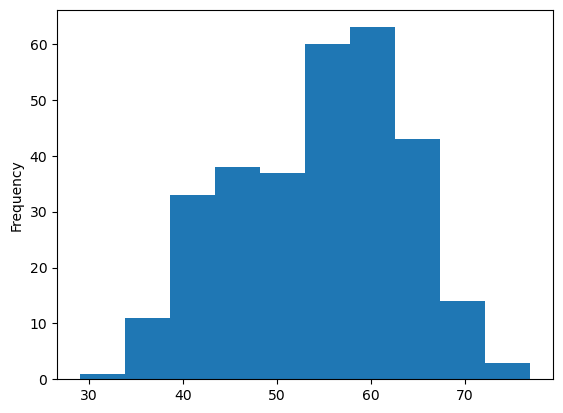

In [81]:
#Now we can create the histogram plot to see that heart disease depends on age or not
df.age.plot.hist();
#The below plot show that higher age people have high rate of heart disease because it give us skewed distribution not guassian distribution 
#histgram also show that the outlier and show that your graph is how skewed from guassian distribution

In [84]:
# Now we can check the relatoin between chest pain type and target
# so first we can check the value_count 
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

# cp: chest pain type
### value 0: typical angina: chest pain due to decrease blood pressure
### value 1: atypical angina: chest pain not related to heart problem
### value 2: non_anginal pain: Not Heart Related
### value 3:asymptomatic: chest pain not showing heart problem

In [89]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


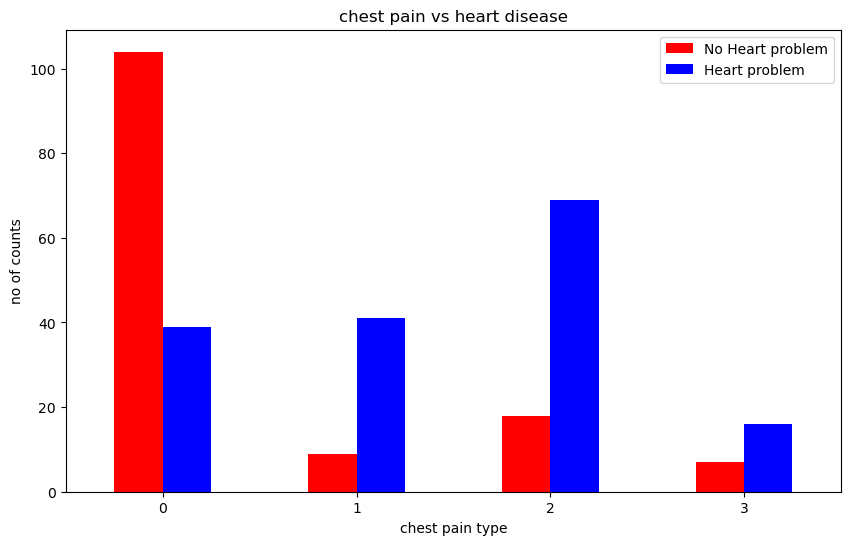

In [92]:
#make the bar chart of chest pain vs target
pd.crosstab(df.cp,df.target).plot(kind = 'bar',figsize =(10,6),color = ['red','blue'])
#make some description of the chart
plt.title('chest pain vs heart disease')
plt.xlabel('chest pain type')
plt.ylabel('no of counts')
plt.legend(['No Heart problem','Heart problem'])
plt.xticks(rotation = 0);

In [95]:
# correlation matric
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


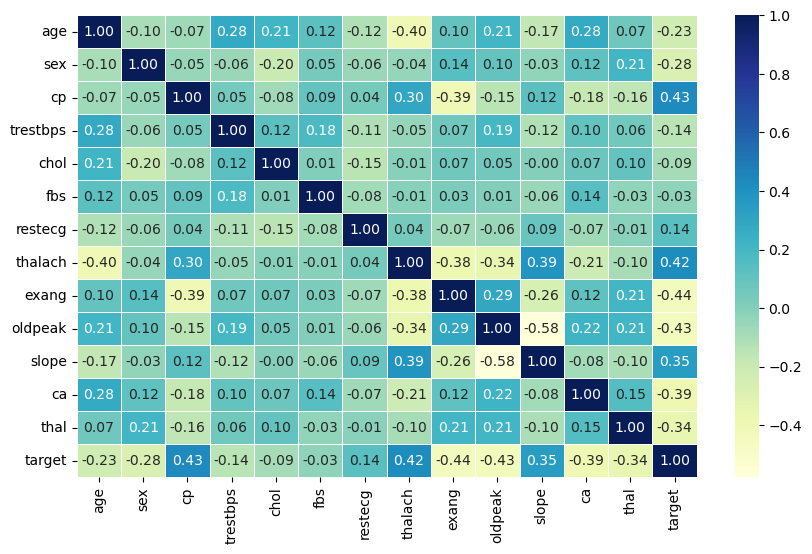

In [98]:
# Now we can draw a correlation
cor_map = df.corr()
fig,ax = plt.subplots(figsize= (10,6))
axes = sns.heatmap(cor_map,
                   annot = True,
                   linewidths = 0.5,
                   fmt = ".2f",
                   cmap = "YlGnBu",
                   ax=ax);
plt.show()
#In the below correlation grap some variable have show the negative compare to target
#which is weak while some show positive which show strong 

# Modeling

In [103]:
# we can split the data into x and y variable
x = df.drop("target", axis = 1)
y = df['target']

In [106]:
#using random seed,so that others could produce the same result
np.random.seed(7)
# split into test and train data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

# Now we can choose the right model based on the data 
1. K-Nearest Neighbours Classifier
2. Random Forest Classifier
3. Logistic Regression

In [111]:
# Now we first make all the model in dictoinary for loop
models = {"knn":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
          "Logistic Regression":LogisticRegression()}

In [114]:
#Now create a function to evaluate the models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(7)
    # Make a dictionary to score the model 
    model_score = {}
    #Looping through the name return the key while model is its value in the above dictionary
    for name,model in models.items():
        model.fit(x_train,y_train)
        #Evaluate the model and append it to model_score empty dictionary
        model_score[name] = model.score(x_test,y_test)
        
    return model_score

In [117]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'knn': 0.5573770491803278,
 'Random Forest': 0.7213114754098361,
 'Logistic Regression': 0.7540983606557377}

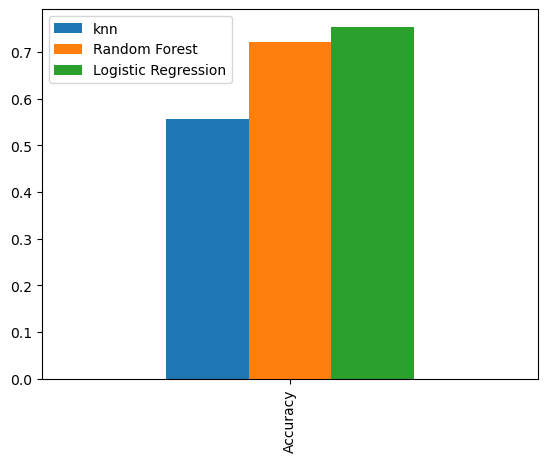

In [120]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.plot.bar();

# Improving and Tuning the Model
   Universal Methods Used for all Classification problems
   * Hyperparameter Tunning
   * Features Improving<br>
   Advanced Level Features<br>
   * Confusion_Matrix
   * Cross_validation
   * Precision
   *Recall
   * f1
   * Classification Report
   * ROC Curve<br>

# Now we can talk about this two parameter<br>
    * Hyperparameter Tunning<br>
    * Features Improving
   

In [127]:
# NOw we can start the KNN evaluation
train_score = []
test_score = []
#create range to be test for n_neighbors
nneighbors = range(1,30)
#KNN instance
knn = KNeighborsClassifier()
# Using loop through range
for i in nneighbors:
    knn.set_params(n_neighbors = i)
    # Run the fit for ith value
    knn.fit(x_train,y_train)
    # update the training score
    train_score.append(knn.score(x_train,y_train))
    #update the test score list
    test_score.append(knn.score(x_test,y_test))
    

In [130]:
train_score

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339,
 0.7024793388429752,
 0.7024793388429752,
 0.7107438016528925,
 0.6900826446280992,
 0.7107438016528925,
 0.7066115702479339,
 0.7107438016528925,
 0.7066115702479339,
 0.7066115702479339]

In [133]:
test_score

[0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.5573770491803278,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score:70.49%


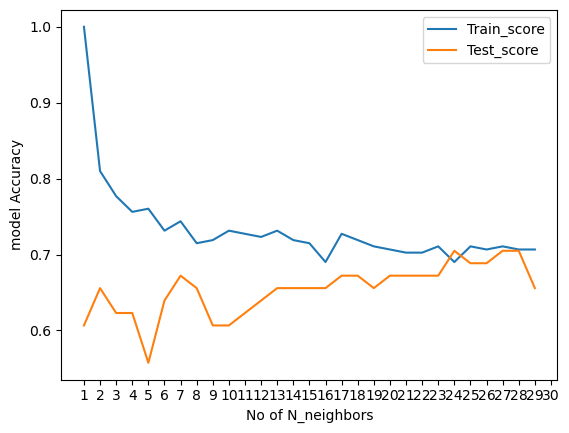

In [136]:
# Plot the Accuracy Score

plt.plot(nneighbors,train_score , label = "Train_score")
plt.plot(nneighbors,test_score, label = "Test_score")
plt.xticks(np.arange(1,31,1))
plt.xlabel("No of N_neighbors")
plt.ylabel("model Accuracy")
plt.legend()
print(f"Max KNN score:{max(test_score)*100:0.2f}%")

# Hyperparameter tunning using Randomized Search CV
 .LogisticRegression()<br>
  RandomForestClassifier()

In [141]:
#Now we make a dictionary for ligisticRegression and RandomForestClassifier
LR_hp = {"C":np.logspace(-4,4,20),
         "solver": ['liblinear']}
RFC_hp = {"n_estimators":np.arange(10,1600,100),
          "max_depth":[None,3,5,6,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [144]:
#Tune the logistic Regression
np.random.seed(7)
#lets Use RSCV to tune Hyperparameter
LR = RandomizedSearchCV(LogisticRegression(),
                        param_distributions = LR_hp,
                        cv = 5,
                        n_iter = 20,
                        verbose = True)
# Fit the ramdom HP search model for LR
LR.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [146]:
LR.score(x_test,y_test)

0.7540983606557377

In [148]:
LR.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [150]:
#Tune the Random Forest Classifier
np.random.seed(7)
#lets Use RSCV to tune Hyperparameter
RFC = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions = RFC_hp,
                        cv = 5,
                        n_iter = 20,
                        verbose = True)
# Fit the ramdom HP search model for RFC
RFC.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [151]:
RFC.best_estimator_.score(x_test,y_test)

0.7049180327868853

In [154]:
RFC.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_depth': 6}

*'knn': 0.5573770491803278, We have already dropped it
* 'Random Forest': 0.7213114754098361, After hyperparameter tuning = 0.7040180327868853
 *'Logistic Regression': 0.7540983606557377, After hyperparameter tuning = 0.7540983606557

* 1. By Hand Hyperparameter Tuning # Done it been there,seen it all
* 2. Randomized Search CV # Now try this 
* 3. Grid Search CV # and also try this one

# Hyperparameter tuning using GridSearch CV

In [162]:
#Tune the logistic Regression using GSCV
np.random.seed(7)
#lets Use RSCV to tune Hyperparameter
LR_GS = GridSearchCV(LogisticRegression(),
                        param_grid = LR_hp,
                        cv = 5,
                        verbose = True)
# Fit the ramdom HP search model for LR
LR_GS.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [164]:
LR_GS.score(x_test,y_test)

0.7540983606557377

#Tune the Random Forest Classifier using GSCV

In [168]:
np.random.seed(7)

RFC_RS = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=RFC_hp,
    n_iter=50,     # Try 50 random combinations instead of 7200 full grid
    cv=5,
    verbose=True,
    n_jobs=-1      # Use all CPU cores (optional)
)
# Fit the ramdom HP search model for LR
RFC_RS.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [170]:
RFC_RS.score(x_test,y_test)

0.7213114754098361

# Improving and Tuning the Model
Universal Methods Used for all Classification problems

Hyperparameter Tunning
Features Improving
Advanced Level Features
Confusion_Matrix
Cross_validation
Precision *Recall
f1
Classification Report
ROC Curve

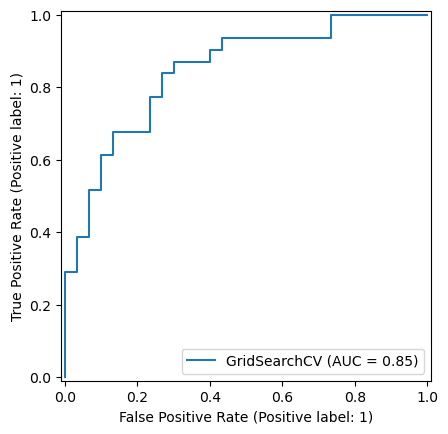

In [183]:
# plotting the area under the curve and logistic regression give 85% accuracy
# so we can import plot_roc_curve

y_pred = LR_GS.predict(x_test)
RocCurveDisplay.from_estimator(LR_GS,x_test,y_test)

In [185]:
#confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[18 12]
 [ 3 28]]


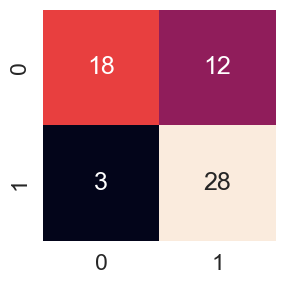

In [187]:
sns.set(font_scale = 1.5)
def plot_confusion(y_test,y_pred):
    "This is plot the confusion matrix"
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),
            annot = True,
            cbar = False)
plot_confusion(y_test,y_pred)

In [195]:
# Ploty the Classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



In [197]:
# Cross Validation layer
LR_GS.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [205]:
lr =LogisticRegression(solver = "liblinear",C = 0.615848211066026)

# cross validated Accuracy
cv_accuracy = cross_val_score(lr,
                              x,
                              y,
                              cv = 7,
                              scoring="accuracy")

In [207]:
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8284506191482934

In [209]:
# cross validated precision
cv_precision = cross_val_score(lr,
                              x,
                              y,
                              cv = 7,
                              scoring="precision")

In [212]:
cv_precison = np.mean(cv_accuracy)
cv_precison

0.8284506191482934

In [214]:
# cross validated recall
cv_recall = cross_val_score(lr,
                              x,
                              y,
                              cv = 7,
                              scoring="recall")

In [216]:
cv_recall = np.mean(cv_accuracy)
cv_recall

0.8284506191482934

In [218]:


# cross validated f1
cv_f1 = cross_val_score(lr,
                              x,
                              y,
                              cv = 7,
                              scoring="f1")

In [220]:
cv_f1 = np.mean(cv_accuracy)
cv_f1

0.8284506191482934

# Visualizing the Cross Validated Matrics

<Axes: title={'center': 'comparison of the Matrics'}>

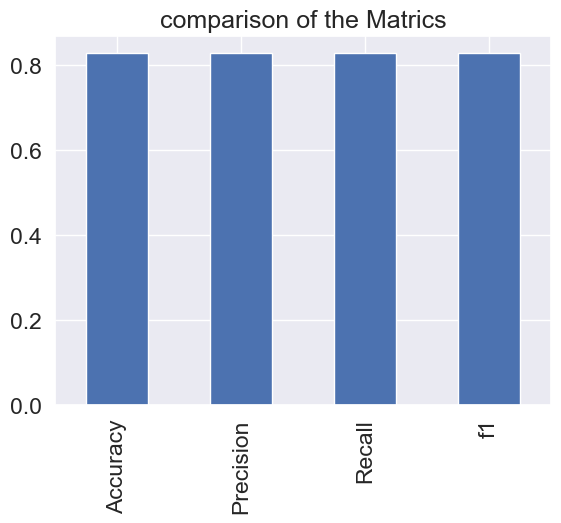

In [227]:
cv_plot = pd.DataFrame({
    "Accuracy":cv_accuracy,
    "Precision":cv_precison,
    "Recall":cv_recall,
    "f1":cv_f1},index = [0])
cv_plot.T.plot.bar(title="comparison of the Matrics",
                 legend = False)

# Feature Improving

In [230]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [234]:
# Check the coeficcient function tell that each column relation with target variable
lr.fit(x_train,y_train)
lr.coef_

array([[ 0.02252203, -1.36931508,  0.79024727, -0.02405079, -0.00188934,
         0.45440863,  0.40806228,  0.035555  , -0.78437428, -0.56658938,
         0.52894171, -0.64641313, -1.10031521]])

In [238]:
# now check by name its relation 
final_coef = dict(zip(df.columns,list(lr.coef_[0])))
final_coef

{'age': 0.022522029790988902,
 'sex': -1.369315078530457,
 'cp': 0.7902472653002438,
 'trestbps': -0.024050794197427644,
 'chol': -0.001889344518362533,
 'fbs': 0.454408627822306,
 'restecg': 0.40806227989876553,
 'thalach': 0.03555499572128291,
 'exang': -0.7843742791918811,
 'oldpeak': -0.5665893803503371,
 'slope': 0.5289417069090245,
 'ca': -0.6464131290428378,
 'thal': -1.1003152092892416}

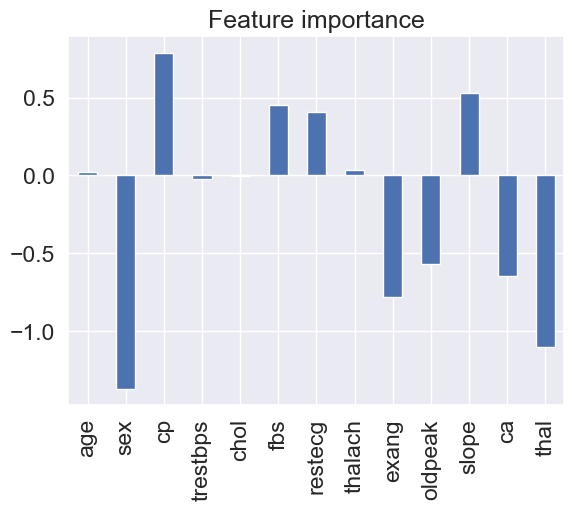

In [240]:
# now we can plot it
features = pd.DataFrame(final_coef,index=[0])
features.T.plot.bar(title="Feature importance", legend = False);

# Conclusion

* we set 95% accuracy goal, but we did not meet
we can ask some Question
* What if we try to got more data
* what if we try to imporve the quality of the data
* what if we try to use other models and see if there is any improvements